list of joint probs:
[[[0.11, 0.13, 0.12], [0.07, 0.14, 0.13], [0.12, 0.09, 0.09]], [[0.29, 0.02, 0.03], [0.04, 0.26, 0.02], [0.01, 0.03, 0.3]], [[0.3, 0.02, 0.03], [0.05, 0.28, 0.03], [0.04, 0.01, 0.24]], [[0.25, 0.07, 0.0], [0.02, 0.27, 0.06], [0.03, 0.03, 0.27]], [[0.24, 0.07, 0.01], [0.04, 0.25, 0.03], [0.05, 0.02, 0.29]], [[0.26, 0.03, 0.03], [0.02, 0.27, 0.03], [0.03, 0.04, 0.29]], [[0.3, 0.01, 0.01], [0.07, 0.26, 0.0], [0.01, 0.02, 0.32]], [[0.28, 0.03, 0.01], [0.05, 0.32, 0.01], [0.02, 0.04, 0.24]], [[0.21, 0.02, 0.03], [0.01, 0.3, 0.04], [0.05, 0.03, 0.31]], [[0.27, 0.05, 0.04], [0.06, 0.21, 0.02], [0.03, 0.02, 0.3]], [[0.3, 0.01, 0.04], [0.04, 0.32, 0.02], [0.05, 0.02, 0.2]], [[0.22, 0.02, 0.0], [0.02, 0.33, 0.08], [0.03, 0.03, 0.27]], [[0.33, 0.01, 0.02], [0.02, 0.22, 0.04], [0.0, 0.03, 0.33]], [[0.31, 0.03, 0.02], [0.04, 0.26, 0.08], [0.03, 0.02, 0.21]], [[0.28, 0.0, 0.05], [0.01, 0.32, 0.04], [0.06, 0.04, 0.2]], [[0.26, 0.04, 0.05], [0.01, 0.28, 0.02], [0.02, 0.01, 0.31]],

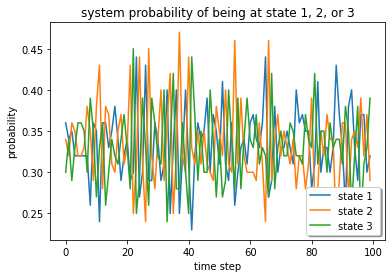

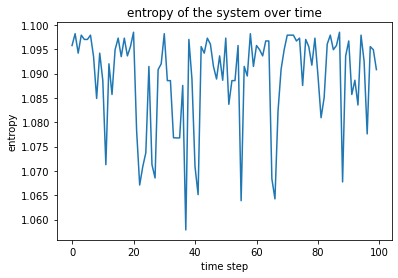

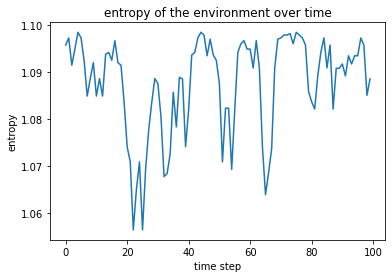

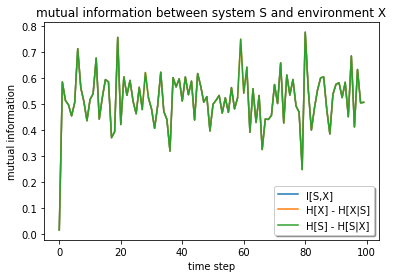

[[0.27, 0.38, 0.35], [0.35, 0.26, 0.39], [0.38, 0.31, 0.31], [0.35, 0.36, 0.29], [0.29, 0.33, 0.38], [0.33, 0.31, 0.36], [0.36, 0.36, 0.28], [0.3, 0.39, 0.31], [0.32, 0.27, 0.41], [0.43, 0.32, 0.25], [0.25, 0.44, 0.31], [0.29, 0.24, 0.47], [0.45, 0.31, 0.24], [0.25, 0.44, 0.31], [0.24, 0.29, 0.47], [0.45, 0.28, 0.27], [0.3, 0.43, 0.27], [0.26, 0.34, 0.4], [0.38, 0.27, 0.35], [0.39, 0.34, 0.27], [0.25, 0.4, 0.35], [0.34, 0.23, 0.43], [0.44, 0.32, 0.24], [0.26, 0.44, 0.3], [0.3, 0.29, 0.41], [0.43, 0.28, 0.29], [0.3, 0.4, 0.3], [0.31, 0.29, 0.4], [0.44, 0.28, 0.28], [0.3, 0.42, 0.28], [0.29, 0.34, 0.37], [0.35, 0.29, 0.36], [0.34, 0.35, 0.31], [0.34, 0.33, 0.33], [0.33, 0.35, 0.32], [0.32, 0.38, 0.3], [0.32, 0.32, 0.36], [0.37, 0.29, 0.34], [0.33, 0.38, 0.29], [0.32, 0.28, 0.4], [0.44, 0.31, 0.25], [0.29, 0.42, 0.29], [0.29, 0.29, 0.42], [0.45, 0.28, 0.27], [0.28, 0.42, 0.3], [0.35, 0.29, 0.36], [0.35, 0.35, 0.3], [0.33, 0.36, 0.31], [0.33, 0.37, 0.3], [0.3, 0.33, 0.37], [0.34, 0.28, 0.3

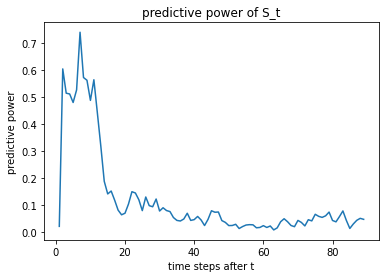

In [2]:
from re import T
from three_state_simulation import generate_ensemble, stationary_distribution
from matplotlib import pyplot as plt
import numpy as np
import mpmath as mp
from typing import List

# data to keep track of 
list_of_env_sys_tuples = generate_ensemble(100)
time_steps = len(list_of_env_sys_tuples[0][1]) # time steps 
sys_probabilities = [[None, None, None] \
    for row in range(time_steps)]
list_of_joint_probs = [None for row in range(time_steps)]
env_probabilities = [[None, None, None] \
    for row in range(time_steps)]
mutual_info = [0] * time_steps
h_xy = [0] * time_steps
h_yx = [0] * time_steps
mutual_info_c_xs = [0] * time_steps
mutual_info_c_sx = [0] * time_steps
# for prediction

def calculate_probs():
    """
    fills up sys_probabilities matrix, env_probabilities matrix, 
    where each row is the time step up to n time steps
    and each column is the probability of being at state 1 (A for environment), 2 (B), or 3 (C) respectively. 
    ex: [[P(S_0 = 1), P(S_0 = 2), P(S_0 = 3)],
         [P(S_1 = 1), P(S_1 = 2), P(S_1 = 3)],
         ...
         [P(S_n = 1), P(S_n = 2), P(S_n = 3)]]
    
    fills up list_of_joint_probs list of matrices, with the following format:
    [[[P(S_X_0 = a_1), P(S_X_0 = b_1), P(S_X_0 = c_1)], [[P(S_X_1 = a_1), P(S_X_1 = b_1), P(S_X_1 = c_1)],      
      [P(S_X_0 = a_2), P(S_X_0 = b_2), P(S_X_0 = c_2)],  [P(S_X_1 = a_2), P(S_X_1 = b_2), P(S_X_1 = c_2)], 
      [P(S_X_0 = a_3), P(S_X_0 = b_3), P(S_X_0 = c_3)]], [P(S_X_1 = a_3), P(S_X_1 = b_3), P(S_X_1 = c_3)]], ... 
    """
    state_1_count = 0
    state_2_count = 0
    state_3_count = 0
    a_count = 0
    b_count = 0
    c_count = 0
    a_1 = 0
    b_1 = 0
    c_1 = 0
    a_2 = 0
    b_2 = 0
    c_2 = 0
    a_3 = 0
    b_3 = 0
    c_3 = 0
    n = len(list_of_env_sys_tuples)
    for t in range(time_steps): #  gives us number of time steps
        for e in range(n): # gives us number of ensembles
            if list_of_env_sys_tuples[e][1][t] == 1:
                state_1_count = state_1_count+1
                # looking through associated environments to set up joint_probabilities_list
                if list_of_env_sys_tuples[e][0][t] == 1:
                    a_1 = a_1 + 1
                    a_count = a_count + 1 
                elif list_of_env_sys_tuples[e][0][t] == 2:
                    b_1 = b_1 + 1
                    b_count = b_count + 1 
                else:
                    c_1 = c_1 + 1
                    c_count = c_count + 1 
            elif list_of_env_sys_tuples[e][1][t] == 2:
                state_2_count = state_2_count+1
                if list_of_env_sys_tuples[e][0][t] == 1:
                    a_2 = a_2 + 1
                    a_count = a_count + 1 
                elif list_of_env_sys_tuples[e][0][t] == 2:
                    b_2 = b_2 + 1
                    b_count = b_count + 1
                else:
                    c_2 = c_2 + 1
                    c_count = c_count + 1 
            else:
                state_3_count = state_3_count+1
                if list_of_env_sys_tuples[e][0][t] == 1:
                    a_3 = a_3 + 1
                    a_count = a_count + 1 
                elif list_of_env_sys_tuples[e][0][t] == 2:
                    b_3 = b_3 + 1
                    b_count = b_count + 1 
                else:
                    c_3 = c_3 + 1
                    c_count = c_count + 1 
        # filling the data structures
        prob_array = [[None, None, None], [None, None, None], [None, None, None]]
        prob_array[0][0] = a_1/n
        prob_array[0][1] = b_1/n
        prob_array[0][2] = c_1/n
        prob_array[1][0] = a_2/n
        prob_array[1][1] = b_2/n
        prob_array[1][2] = c_2/n
        prob_array[2][0] = a_3/n
        prob_array[2][1] = b_3/n
        prob_array[2][2] = c_3/n
        list_of_joint_probs[t] = prob_array
        sys_probabilities[t][0] = state_1_count/n
        sys_probabilities[t][1] = state_2_count/n
        sys_probabilities[t][2] = state_3_count/n
        env_probabilities[t][0] = a_count/n
        env_probabilities[t][1] = b_count/n
        env_probabilities[t][2] = c_count/n
        # resetting the values 
        state_1_count = 0
        state_2_count = 0
        state_3_count = 0
        a_count = 0
        b_count = 0
        c_count = 0
        a_1 = 0
        b_1 = 0
        c_1 = 0
        a_2 = 0
        b_2 = 0
        c_2 = 0
        a_3 = 0
        b_3 = 0
        c_3 = 0

def plot_state_probs():
    """
    first gathers probabilities of being at state 1, 2, or 3 at given time step,
    then plots the system probabilities
    """
    data_1 = []
    data_2 = []
    data_3 = []
    for x in range(time_steps):
        data_1.append(sys_probabilities[x][0])
        data_2.append(sys_probabilities[x][1])
        data_3.append(sys_probabilities[x][2])
    plt.plot(data_1, label = 'state 1 ')
    plt.plot(data_2, label = 'state 2')
    plt.plot(data_3, label = 'state 3')
    legend = plt.legend(loc='lower right', shadow=True, fontsize = 'medium') 
    legend.get_frame().set_facecolor('w')
    plt.xlabel("time step")
    plt.ylabel("probability")
    plt.title("system probability of being at state 1, 2, or 3")
    plt.show()

def entropy(env_or_sys_probs):
    """
    uses Shannon entropy formula to find system entropy at each time step as a list"""
    h = [None] * time_steps
    for x in range(time_steps):
        h[x] = -((env_or_sys_probs[x][0]*np.log(env_or_sys_probs[x][0])) \
            + (env_or_sys_probs[x][1]*np.log(env_or_sys_probs[x][1])) \
                + (env_or_sys_probs[x][2]*np.log(env_or_sys_probs[x][2])))
    return h
    
def plot_sys_entropy(sys_probs):
    """
    plot entropy of either environment or system over time
    """
    plt.xlabel("time step")
    plt.ylabel("entropy")
    plt.title("entropy of the system over time")
    plt.plot(entropy(sys_probs))
    plt.show()

def plot_env_entropy(env_probs):
    """
    plot entropy of either environment or system over time
    """
    plt.xlabel("time step")
    plt.ylabel("entropy")
    plt.title("entropy of the environment over time")
    plt.plot(entropy(env_probs))
    plt.show()

calculate_probs()

def verify_stationary(): 
    """
    quick method to verify that env states over many ensembles converge to stationary/steady-state dist
    for transition matrix p_transition_env = np.array([[.1, .4, .5],
                                                      [.1, .4, .5],
                                                      [.1, .5, .4]]),
    should get [0.1       , 0.44545455, 0.45454545] based on linear algebra                                              
    """
    a_stationary = 0
    b_stationary = 0
    c_stationary = 0
    for x in range(time_steps):
        a_stationary = a_stationary + env_probabilities[x][0]
        b_stationary = b_stationary + env_probabilities[x][1]
        c_stationary = c_stationary + env_probabilities[x][2]
    stationary_dist_list = [None, None, None]
    stationary_dist_list[0] = a_stationary/time_steps
    stationary_dist_list[1] = b_stationary/time_steps
    stationary_dist_list[2] = c_stationary/time_steps
    return stationary_dist_list


def mutual_information():
    """
    calculates mutual information at each time step 
    """
    for t in range(time_steps):
        p_a_1 = list_of_joint_probs[t][0][0]
        p_a_2 = list_of_joint_probs[t][1][0]
        p_a_3 = list_of_joint_probs[t][2][0]
        p_b_1 = list_of_joint_probs[t][0][1]
        p_b_2 = list_of_joint_probs[t][1][1]
        p_b_3 = list_of_joint_probs[t][2][1]
        p_c_1 = list_of_joint_probs[t][0][2]
        p_c_2 = list_of_joint_probs[t][1][2]
        p_c_3 = list_of_joint_probs[t][2][2]
        p_a = env_probabilities[t][0]
        p_b = env_probabilities[t][1]
        p_c = env_probabilities[t][2]
        p_1 = sys_probabilities[t][0]
        p_2 = sys_probabilities[t][1]
        p_3 = sys_probabilities[t][2]
        if p_a_1 and p_a and p_1 != 0: #  was getting divide by 0 and ln 0 errors
            mutual_info[t] = mutual_info[t] + float(mp.fmul(p_a_1, mp.log(p_a_1 / mp.fmul(p_a, p_1)))) 
        if p_a_1 and p_a and p_2 != 0: 
            mutual_info[t] = mutual_info[t] + float(mp.fmul(p_a_2, mp.log(p_a_2 / mp.fmul(p_a, p_2))))
        if p_a_3 and p_a and p_3 != 0:
            mutual_info[t] = mutual_info[t] + float(mp.fmul(p_a_3, mp.log(p_a_3 / mp.fmul(p_a, p_3))))
        if p_b_1 and p_b and p_1 != 0:
            mutual_info[t] = mutual_info[t] + float(mp.fmul(p_b_1, mp.log(p_b_1 / mp.fmul(p_b, p_1))))
        if p_b_2 and p_b and p_2 != 0:
            mutual_info[t] = mutual_info[t] + float(mp.fmul(p_b_2, mp.log(p_b_2 / mp.fmul(p_b, p_2))))
        if p_b_3 and p_b and p_3 != 0:
            mutual_info[t] = mutual_info[t] + float(mp.fmul(p_b_3, mp.log(p_b_3 / mp.fmul(p_b, p_3))))
        if p_c_1 and p_c and p_1 != 0:
            mutual_info[t] = mutual_info[t] + float(mp.fmul(p_c_1, mp.log(p_c_1 / mp.fmul(p_c, p_1))))
        if p_c_2 and p_c and p_2 != 0:
            mutual_info[t] = mutual_info[t] + float(mp.fmul(p_c_2, mp.log(p_c_2 / mp.fmul(p_c, p_2))))
        if p_c_3 and p_c and p_3 != 0:
            mutual_info[t] = mutual_info[t] + float(mp.fmul(p_c_3, mp.log(p_c_3 / mp.fmul(p_c, p_3))))
    return mutual_info

print("list of joint probs:")
print(list_of_joint_probs)
print("env probabilities:")
print(env_probabilities)
print("sys probabilities:")
print(sys_probabilities)
mutual_information()
print("mutual info:")
print(mutual_info)

def conditional_entropy_xs(joint_prob: List[np.array], cond_term: np.array):
    """
    For I[X|S], where X env and S is sys, plug the joint probs and S (sys) probabilities into this method
    """
    for t in range(time_steps):
        if joint_prob[t][0][0] and cond_term[t][0] != 0:
            h_yx[t] = h_yx[t] + (joint_prob[t][0][0]*np.log(cond_term[t][0]/joint_prob[t][0][0]))
        if joint_prob[t][1][0] and cond_term[t][1] != 0:
            h_yx[t] = h_yx[t] + (joint_prob[t][1][0]*np.log(cond_term[t][1]/joint_prob[t][1][0]))
        if joint_prob[t][2][0] and cond_term[t][2] != 0:
            h_yx[t] = h_yx[t] + (joint_prob[t][2][0]*np.log(cond_term[t][2]/joint_prob[t][2][0])) 
        if joint_prob[t][0][1] and cond_term[t][0] != 0:
            h_yx[t] = h_yx[t] + (joint_prob[t][0][1]*np.log(cond_term[t][0]/joint_prob[t][0][1])) 
        if joint_prob[t][1][1] and cond_term[t][1] != 0:
            h_yx[t] = h_yx[t] + (joint_prob[t][1][1]*np.log(cond_term[t][1]/joint_prob[t][1][1]))
        if joint_prob[t][2][1] and cond_term[t][2] != 0:
            h_yx[t] = h_yx[t] + (joint_prob[t][2][1]*np.log(cond_term[t][2]/joint_prob[t][2][1])) 
        if joint_prob[t][0][2] and cond_term[t][0] != 0:
            h_yx[t] = h_yx[t] + (joint_prob[t][0][2]*np.log(cond_term[t][0]/joint_prob[t][0][2])) 
        if joint_prob[t][1][2] and cond_term[t][1] != 0:
            h_yx[t] = h_yx[t] + (joint_prob[t][1][2]*np.log(cond_term[t][1]/joint_prob[t][1][2])) 
        if joint_prob[t][2][2] and cond_term[t][2] != 0:
            h_yx[t] = h_yx[t] + (joint_prob[t][2][2]*np.log(cond_term[t][2]/joint_prob[t][2][2]))
    return h_yx

def conditional_entropy_sx(joint_prob: List[np.array], cond_term: np.array):
    """
    For I[S|X], where S is sys and X is env, plug in env X probabilities"""
    for t in range(time_steps):
        if joint_prob[t][0][0] and cond_term[t][0] != 0:
            h_xy[t] = h_xy[t] + (joint_prob[t][0][0]*np.log(cond_term[t][0]/joint_prob[t][0][0]))
        if joint_prob[t][1][0] and cond_term[t][0] != 0:
            h_xy[t] = h_xy[t] + (joint_prob[t][1][0]*np.log(cond_term[t][0]/joint_prob[t][1][0])) 
        if joint_prob[t][2][0] and cond_term[t][0] != 0:
            h_xy[t] = h_xy[t] + (joint_prob[t][2][0]*np.log(cond_term[t][0]/joint_prob[t][2][0])) 
        if joint_prob[t][0][1] and cond_term[t][1] != 0:
            h_xy[t] = h_xy[t] + (joint_prob[t][0][1]*np.log(cond_term[t][1]/joint_prob[t][0][1])) 
        if joint_prob[t][1][1] and cond_term[t][1] != 0:
            h_xy[t] = h_xy[t] + (joint_prob[t][1][1]*np.log(cond_term[t][1]/joint_prob[t][1][1])) 
        if joint_prob[t][2][1] and cond_term[t][1] != 0:
            h_xy[t] = h_xy[t] + (joint_prob[t][2][1]*np.log(cond_term[t][1]/joint_prob[t][2][1])) 
        if joint_prob[t][0][2] and cond_term[t][2] != 0:
            h_xy[t] = h_xy[t] + (joint_prob[t][0][2]*np.log(cond_term[t][2]/joint_prob[t][0][2])) 
        if joint_prob[t][1][2] and cond_term[t][2] != 0:
            h_xy[t] = h_xy[t] + (joint_prob[t][1][2]*np.log(cond_term[t][2]/joint_prob[t][1][2])) 
        if joint_prob[t][2][2] and cond_term[t][2] !=0:
            h_xy[t] = h_xy[t] + (joint_prob[t][2][2]*np.log(cond_term[t][2]/joint_prob[t][2][2]))
    return h_xy

# for testing: I[X|Y] = H(X) - H(X|Y)
# entropy(sys_probabilities)
# conditional_entropy_xy(list_of_joint_probs, env_probabilities)

def mutual_info_using_conditional_sx(): # this is working, matches mi 
    """
    to verify that mutual info is correct
    """
    sys_entropy = entropy(sys_probabilities)
    cond_entropy_sx = conditional_entropy_sx(list_of_joint_probs, env_probabilities)
    for t in range(time_steps):
        mutual_info_c_sx[t] = sys_entropy[t] - cond_entropy_sx[t]
    return mutual_info_c_sx



def mutual_info_using_conditional_xs(): # this is not working 
    """
    to verify that mutual info is correct
    """
    env_entropy = entropy(env_probabilities)
    cond_entropy_xs = conditional_entropy_xs(list_of_joint_probs, sys_probabilities)
    for t in range(time_steps):
        mutual_info_c_xs[t] = env_entropy[t] - cond_entropy_xs[t]
    return mutual_info_c_xs

# fills lists with data 
mutual_info_using_conditional_xs()
mutual_info_using_conditional_sx()

def plot_mutual_information():
    """
    plots mutual information over time
    plots all 3 ways of getting mutual information- using formula and entropies
    """
    plt.xlabel("time step")
    plt.ylabel("mutual information")
    plt.title("mutual information between system S and environment X")
    plt.plot(mutual_info, label = 'I[S,X]')
    plt.plot(mutual_info_c_xs, label = 'H[X] - H[X|S]')
    plt.plot(mutual_info_c_sx, label = 'H[S] - H[S|X]')
    legend = plt.legend(loc='lower right', shadow=True, fontsize = 'medium') 
    legend.get_frame().set_facecolor('w')
    plt.show()

# plot_state_probs()
print("list of joint probs")
print(list_of_joint_probs)
plot_state_probs()
plot_sys_entropy(sys_probabilities)
plot_env_entropy(env_probabilities)
plot_mutual_information()


# need to modify way we're filling up data strutures for prediction I[s_t, x_t + 1]

def calculate_probs_pred(sys_start_time : int): 
    """  
    fills up list_of_joint_probs list of matrices, with the following format:

    [[[P(S_t_X_t+1 = a_1), P(S_t_X_t+1 = b_1), P(S_t_X_t+1 = c_1)], [[P(S_t_X_t+2 = a_1), P(S_t_X_t+2 = b_1), P(S_t_X_t+2 = c_1)],      
      [P(S_t_X_t+1 = a_2), P(S_t_X_t+1 = b_2), P(S_t_X_t+1 = c_2)],  [P(S_t_X_t+2 = a_2), P(S_t_X_t+2 = b_2), P(S_t_X_t+2 = c_2)], 
      [P(S_t_X_t+1 = a_3), P(S_t_X_t+1 = b_3), P(S_t_X_t+1 = c_3)]], [P(S_t_X_t+2 = a_3), P(S_t_X_t+2 = b_3), P(S_t_X_t+2 = c_3)]], ... 
    """
     # memory, where sys and env are in parallel 
    a_1 = 0
    b_1 = 0
    c_1 = 0
    a_2 = 0
    b_2 = 0
    c_2 = 0
    a_3 = 0
    b_3 = 0
    c_3 = 0
    n = len(list_of_env_sys_tuples)
    for t in range(sys_start_time + 1, time_steps): # starts at index after sys-start time 
        for e in range(n): # gives us number of ensembles
            if list_of_env_sys_tuples[e][1][sys_start_time] == 1:
                # looking through associated environments to set up joint_probabilities_list
                if list_of_env_sys_tuples[e][0][t] == 1:
                    a_1 = a_1 + 1
                elif list_of_env_sys_tuples[e][0][t] == 2:
                    b_1 = b_1 + 1
                else:
                    c_1 = c_1 + 1
            elif list_of_env_sys_tuples[e][1][sys_start_time] == 2:
                if list_of_env_sys_tuples[e][0][t] == 1:
                    a_2 = a_2 + 1
                elif list_of_env_sys_tuples[e][0][t] == 2:
                    b_2 = b_2 + 1
                else:
                    c_2 = c_2 + 1
            else:
                if list_of_env_sys_tuples[e][0][t] == 1:
                    a_3 = a_3 + 1
                elif list_of_env_sys_tuples[e][0][t] == 2:
                    b_3 = b_3 + 1
                else:
                    c_3 = c_3 + 1
        # filling the data structures
        prob_array = [[None, None, None], [None, None, None], [None, None, None]]
        prob_array[0][0] = a_1/n
        prob_array[0][1] = b_1/n
        prob_array[0][2] = c_1/n
        prob_array[1][0] = a_2/n
        prob_array[1][1] = b_2/n
        prob_array[1][2] = c_2/n
        prob_array[2][0] = a_3/n
        prob_array[2][1] = b_3/n
        prob_array[2][2] = c_3/n
        list_of_joint_probs[t] = prob_array
        # resetting the values 
        a_1 = 0
        b_1 = 0
        c_1 = 0
        a_2 = 0
        b_2 = 0
        c_2 = 0
        a_3 = 0
        b_3 = 0
        c_3 = 0  
    global sys_probabilities_pred
    sys_probabilities_pred = sys_probabilities[sys_start_time]
    global env_probabilities_pred
    env_probabilities_pred = env_probabilities[sys_start_time + 1:]

calculate_probs_pred(10)

def I_pred():
    global I_pred_list
    I_pred_list = [0] * len(env_probabilities_pred)
    """
    calculates predictive information S_t has about X_t+1, X_t+1, etc 
    """
    calculate_probs_pred(10)
    for t in range(len(env_probabilities_pred)):
        p_a_1 = list_of_joint_probs[t][0][0]
        p_a_2 = list_of_joint_probs[t][1][0]
        p_a_3 = list_of_joint_probs[t][2][0]
        p_b_1 = list_of_joint_probs[t][0][1]
        p_b_2 = list_of_joint_probs[t][1][1]
        p_b_3 = list_of_joint_probs[t][2][1]
        p_c_1 = list_of_joint_probs[t][0][2]
        p_c_2 = list_of_joint_probs[t][1][2]
        p_c_3 = list_of_joint_probs[t][2][2]
        p_a = env_probabilities_pred[t][0]
        p_b = env_probabilities_pred[t][1]
        p_c = env_probabilities_pred[t][2]
        p_1 = sys_probabilities_pred[0]
        p_2 = sys_probabilities_pred[1]
        p_3 = sys_probabilities_pred[2]
        if p_a_1 and p_a and p_1 != 0: #  was getting divide by 0 and ln 0 errors
            I_pred_list[t] = I_pred_list[t] + float(mp.fmul(p_a_1, mp.log(p_a_1 / mp.fmul(p_a, p_1)))) 
        if p_a_1 and p_a and p_2 != 0: 
            I_pred_list[t] = I_pred_list[t] + float(mp.fmul(p_a_2, mp.log(p_a_2 / mp.fmul(p_a, p_2))))
        if p_a_3 and p_a and p_3 != 0:
            I_pred_list[t] = I_pred_list[t] + float(mp.fmul(p_a_3, mp.log(p_a_3 / mp.fmul(p_a, p_3))))
        if p_b_1 and p_b and p_1 != 0:
            I_pred_list[t] = I_pred_list[t] + float(mp.fmul(p_b_1, mp.log(p_b_1 / mp.fmul(p_b, p_1))))
        if p_b_2 and p_b and p_2 != 0:
            I_pred_list[t] = I_pred_list[t] + float(mp.fmul(p_b_2, mp.log(p_b_2 / mp.fmul(p_b, p_2))))
        if p_b_3 and p_b and p_3 != 0:
            I_pred_list[t] = I_pred_list[t] + float(mp.fmul(p_b_3, mp.log(p_b_3 / mp.fmul(p_b, p_3))))
        if p_c_1 and p_c and p_1 != 0:
            I_pred_list[t] = I_pred_list[t] + float(mp.fmul(p_c_1, mp.log(p_c_1 / mp.fmul(p_c, p_1))))
        if p_c_2 and p_c and p_2 != 0:
            I_pred_list[t] = I_pred_list[t] + float(mp.fmul(p_c_2, mp.log(p_c_2 / mp.fmul(p_c, p_2))))
        if p_c_3 and p_c and p_3 != 0:
            I_pred_list[t] = I_pred_list[t] + float(mp.fmul(p_c_3, mp.log(p_c_3 / mp.fmul(p_c, p_3))))
    print(env_probabilities_pred)
    print(sys_probabilities_pred)
    print(list_of_joint_probs)

I_pred()
print(I_pred_list)


def plot_I_pred():
    # x = [x for x in range(1, len(env_probabilities_pred))]
    # string_x = [str(t) for t in x]
    # x_labels = ['t +' + string_x[t] for t in range(len(string_x))]
    x_axis = [x for x in range(len(env_probabilities_pred))]
    x_axis_plus_one = [x + 1 for x in x_axis]
    # plt.xticks(x_axis_list ,x_labels)
    plt.xlabel("time steps after t")
    plt.ylabel("predictive power")
    plt.title("predictive power of S_t")
    plt.plot(x_axis_plus_one, I_pred_list)
    plt.show()

plot_I_pred()